In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
url = "https://raw.githubusercontent.com/anandprems/SVM_Classification_Regression/main/parkinsons_new.csv"
df = pd.read_csv(url)
df.head()

,name,age,sex,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status
0,phon_R01_S01_1,50,M,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1
1,phon_R01_S01_2,52,F,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1
2,phon_R01_S01_3,54,M,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1
3,phon_R01_S01_4,57,F,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1
4,phon_R01_S01_5,59,M,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1


In [24]:
pd.isnull(df).sum()

name                0
age                 0
sex                 0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
dtype: int64

In [25]:
classes = df['status'].value_counts()
classes

status
1    147
0     48
Name: count, dtype: int64

<Axes: xlabel='status'>

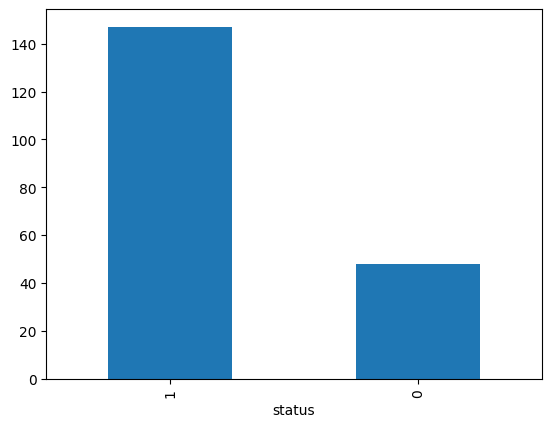

In [26]:
classes.plot.bar()

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder_sex = LabelEncoder()
df['sex'] = label_encoder_sex.fit_transform(df['sex'])

In [28]:
## Correlation between features
corr_var = df.drop(['name'], axis=1).corr()
corr_var

,age,sex,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status
age,1.000000,-0.126711,0.172008,0.148982,0.038964,-0.035772,-0.133640,-0.047860,-0.021276,-0.047874,-0.035082,-0.005326,-0.044542,-0.021582,0.010657,-0.044563,-0.006702,0.018703,-0.094526
sex,-0.126711,1.000000,-0.011284,0.018885,0.084691,-0.016218,0.022168,0.010588,-0.010025,0.010667,-0.049505,-0.048807,-0.029628,-0.043747,-0.096183,-0.029637,0.026993,0.049172,0.032605
MDVP:Fo(Hz),0.172008,-0.011284,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535
MDVP:Fhi(Hz),0.148982,0.018885,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136
MDVP:Flo(Hz),0.038964,0.084691,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200
MDVP:Jitter(%),-0.035772,-0.016218,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220
MDVP:Jitter(Abs),-0.133640,0.022168,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653
MDVP:RAP,-0.047860,0.010588,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668
MDVP:PPQ,-0.021276,-0.010025,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698
Jitter:DDP,-0.047874,0.010667,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646


<Axes: >

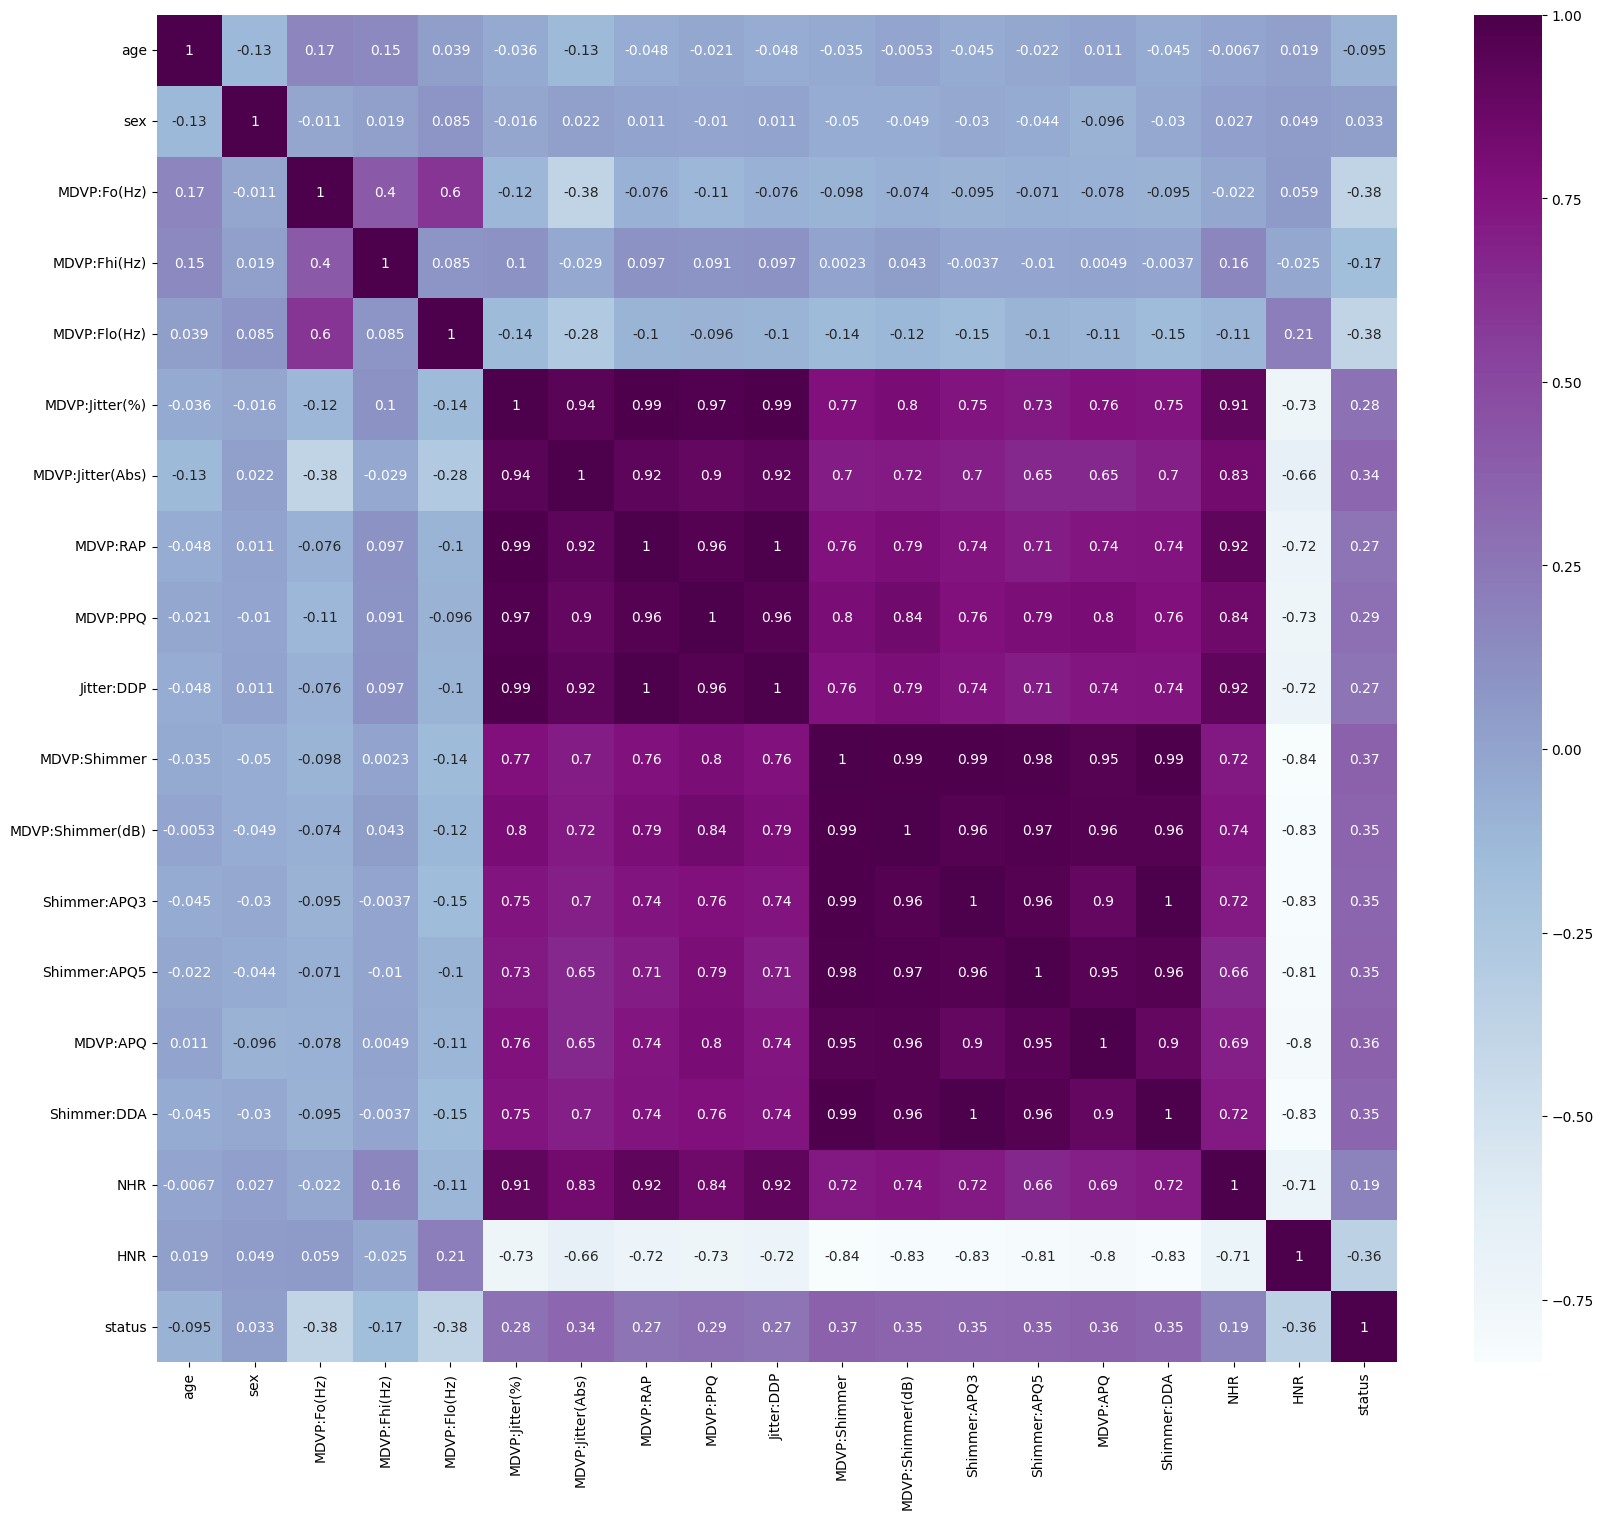

In [29]:
plt.figure(figsize=(20,17.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

In [30]:
X = df.drop(['name', 'status'], axis=1)
y = df['status']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(156, 18) (156,)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Support Vector Classifier

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', C=0.01)
classifier.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [34]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 2,  5],
       [ 2, 30]])

In [36]:
accuracy_score(y_test, y_pred)

0.8205128205128205

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000],
    'degree': [2, 3, 4, 5],
    'gamma': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['rbf', 'poly']
}

In [40]:
classifier_2 = SVC()
grid = GridSearchCV(classifier_2, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_estimator_, grid.best_params_)

SVC(C=5, degree=2, gamma=0.1) {'C': 5, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}


In [43]:
from sklearn.metrics import classification_report
grid_prediction = grid.predict(X_test)

accuracy_score(y_test, grid_prediction)

0.8461538461538461